## BT5153 Group Project Neural Network


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error

### Data Preprocessing

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

,Unnamed: 0,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Movie_aveRating,TV_aveRating,GDP,Population,Gini_Index,Happiness_Share,Life_Satisfaction,Broadband_subscriptions,Cellular_subscriptions,averageRating,numVotes
0,1,AU,Australia,6114,4050,2064,7.84,12.12,16.39,6.868653,6.868653,1.327836e+12,25687041.0,34.3,93.989067,7.137,35.049375,107.663235,6.735294,51170.882353
1,2,AT,Austria,5640,3779,1861,9.03,14.67,20.32,6.758839,6.758839,4.332585e+11,8917205.0,30.2,88.242794,7.213,28.934986,118.607839,6.720000,56523.133333
2,4,BO,Bolivia,4991,3155,1836,7.99,10.99,13.99,6.776089,6.776089,3.657276e+10,10698896.0,43.6,55.744255,5.559,7.983520,101.125004,7.227273,73955.272727
3,6,BG,Bulgaria,6797,4819,1978,9.03,11.29,13.54,6.806522,6.806522,6.988935e+10,6934015.0,40.3,55.744255,5.598,30.677454,114.352765,6.700000,57580.928571
4,7,CA,Canada,6239,4311,1928,7.91,11.87,15.03,6.806172,6.806172,1.645423e+12,38005238.0,33.3,95.050880,7.025,41.801011,95.630528,6.785714,74551.785714
5,8,CL,Chile,4994,3156,1838,7.07,9.91,12.74,6.846409,6.846409,2.529400e+11,19116209.0,44.9,84.669342,6.151,19.623287,131.136145,7.414286,58820.214286
6,9,CO,Colombia,4991,3156,1835,4.31,6.86,9.93,6.797384,6.797384,2.714376e+11,50882884.0,54.2,91.594971,5.709,15.260084,132.996708,6.583333,60612.583333
7,10,CR,Costa Rica,4988,3152,1836,8.99,12.99,15.99,6.735131,6.735131,6.184690e+10,5094114.0,49.3,88.242794,6.998,19.487672,147.471456,7.184615,62899.076923
8,11,HR,Croatia,2274,1675,599,9.03,11.29,13.54,6.850083,6.850083,5.720378e+10,4047200.0,28.9,69.397995,6.508,25.113421,106.587440,6.425000,66751.500000
9,12,CZ,Czechia,7325,5234,2091,8.83,11.49,14.15,6.803730,6.803730,2.453393e+11,11614513.0,25.3,83.524231,6.897,35.508925,121.387394,7.011507,68513.781962


In [4]:
df_x = df.drop(['Cost Per Month - Standard ($)','Cost Per Month - Basic ($)',
                'Cost Per Month - Premium ($)','Country_code','Country'], axis=1)

In [5]:
df_x.describe()

,Unnamed: 0,Total Library Size,No. of TV Shows,No. of Movies,Movie_aveRating,TV_aveRating,GDP,Population,Gini_Index,Happiness_Share,Life_Satisfaction,Broadband_subscriptions,Cellular_subscriptions,averageRating,numVotes
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,32.884615,5396.788462,3575.980769,1820.807692,6.794825,6.794825,1.071427e+12,5.849388e+07,36.678462,82.748453,6.324538,28.213377,125.407849,7.009528,68133.634082
std,18.592275,1021.382480,755.233154,343.923557,0.036896,0.036896,2.996853e+12,1.941550e+08,7.961730,12.155779,0.763869,13.795005,31.589343,0.247600,18241.910668
min,1.000000,2274.000000,1675.000000,373.000000,6.717603,6.717603,1.616370e+09,3.369100e+04,23.200000,50.191204,4.225000,1.615212,70.276933,6.407143,30790.200000
25%,17.750000,4988.750000,3154.000000,1705.000000,6.763430,6.763430,6.068612e+10,5.367649e+06,31.425000,77.051466,5.866750,19.270007,109.824798,6.834687,58315.339286
50%,32.500000,5410.500000,3611.500000,1858.500000,6.794027,6.794027,3.034398e+11,1.115670e+07,34.950000,87.724913,6.245500,29.551364,123.412694,7.011507,63223.000000
75%,49.250000,6091.500000,4014.750000,2011.000000,6.821178,6.821178,7.280281e+11,4.493891e+07,41.735000,92.429024,7.004750,36.884555,133.127499,7.189391,70439.702797
max,63.000000,7325.000000,5234.000000,2387.000000,6.868653,6.868653,2.095303e+13,1.380004e+09,63.000000,96.076927,7.575000,57.852883,291.653600,7.484615,141837.166667


In [6]:
list(df.columns)

['Unnamed: 0',
 'Country_code',
 'Country',
 'Total Library Size',
 'No. of TV Shows',
 'No. of Movies',
 'Cost Per Month - Basic ($)',
 'Cost Per Month - Standard ($)',
 'Cost Per Month - Premium ($)',
 'Movie_aveRating',
 'TV_aveRating',
 'GDP',
 'Population',
 'Gini_Index',
 'Happiness_Share',
 'Life_Satisfaction',
 'Broadband_subscriptions',
 'Cellular_subscriptions',
 'averageRating',
 'numVotes']

In [7]:
library = df['Total Library Size']
tv = df['No. of TV Shows']
movies = df['No. of Movies']
mavgrate = df['Movie_aveRating']
tavgrate = df['TV_aveRating']
gdp = df['GDP']
pop = df['Population']
gini = df['Gini_Index']
happy = df['Happiness_Share']
life = df['Life_Satisfaction']
bsubs = df['Broadband_subscriptions']
csubs = df['Cellular_subscriptions']


In [8]:
x1 = np.column_stack((library,tv,movies,mavgrate,tavgrate,gdp,pop,gini,happy,life,bsubs,csubs))
x1 = sm.add_constant(x1, prepend=True)

In [9]:
cost = df['Cost Per Month - Standard ($)']
y1 = np.array(cost)

### Training and Validation Data Partition

In [10]:
X_train = x1
y_train = y1

In [11]:
#Variables
y_train=np.reshape(y_train, (-1,1))
# y_val=np.reshape(y_val, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
# print(scaler_x.fit(X_val))
# xval_scale=scaler_x.transform(X_val)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
# print(scaler_y.fit(y_val))
# yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()


In [12]:
ytrain_scale.shape

(52, 1)

In [13]:
xtrain_scale.shape

(52, 13)

### Neural Network Configuration

In [14]:
#Input Layer = Number of features in the training set + 1 (12+1)
#Hidden Layer = Training Data Samples/Factor * (Input Neurons + Output Neurons) =>65/13 =4.6

In [15]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


2022-04-24 17:08:17.438515: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=500, batch_size=150, verbose=1)


Epoch 1/500
1/1 [==============================] - 1s 662ms/step - loss: 0.3238 - mse: 0.3238 - mae: 0.5440
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3162 - mse: 0.3162 - mae: 0.5370
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3086 - mse: 0.3086 - mae: 0.5299
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3010 - mse: 0.3010 - mae: 0.5228
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2934 - mse: 0.2934 - mae: 0.5158
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2859 - mse: 0.2859 - mae: 0.5089
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2785 - mse: 0.2785 - mae: 0.5019
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2711 - mse: 0.2711 - mae: 0.4948
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2637 - mse: 0.2637 - mae: 0.4874
Epoch 10/500
1/1 [==========================

1/1 [==============================] - 0s 4ms/step - loss: 0.0258 - mse: 0.0258 - mae: 0.1126
Epoch 78/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0257 - mse: 0.0257 - mae: 0.1123
Epoch 79/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0256 - mse: 0.0256 - mae: 0.1119
Epoch 80/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0255 - mse: 0.0255 - mae: 0.1116
Epoch 81/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0254 - mse: 0.0254 - mae: 0.1113
Epoch 82/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1110
Epoch 83/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.1106
Epoch 84/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1104
Epoch 85/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1101
Epoch 86/500
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.1011
Epoch 154/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.1009
Epoch 155/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0216 - mse: 0.0216 - mae: 0.1008
Epoch 156/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0216 - mse: 0.0216 - mae: 0.1007
Epoch 157/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0215 - mse: 0.0215 - mae: 0.1006
Epoch 158/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0215 - mse: 0.0215 - mae: 0.1004
Epoch 159/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0215 - mse: 0.0215 - mae: 0.1003
Epoch 160/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0214 - mse: 0.0214 - mae: 0.1002
Epoch 161/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0214 - mse: 0.0214 - mae: 0.1000
Epoch 162/500
1/1 [=======================

Epoch 229/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0186 - mse: 0.0186 - mae: 0.0925
Epoch 230/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0185 - mse: 0.0185 - mae: 0.0924
Epoch 231/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185 - mae: 0.0923
Epoch 232/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0185 - mse: 0.0185 - mae: 0.0922
Epoch 233/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.0921
Epoch 234/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.0920
Epoch 235/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0183 - mse: 0.0183 - mae: 0.0919
Epoch 236/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0183 - mse: 0.0183 - mae: 0.0918
Epoch 237/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0183 - mse: 0.0183 - mae: 0.0917
Epoch 238/500
1/1 [=========

1/1 [==============================] - 0s 4ms/step - loss: 0.0161 - mse: 0.0161 - mae: 0.0852
Epoch 305/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0161 - mse: 0.0161 - mae: 0.0851
Epoch 306/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0850
Epoch 307/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0849
Epoch 308/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0849
Epoch 309/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0848
Epoch 310/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0847
Epoch 311/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0846
Epoch 312/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0845
Epoch 313/500
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0142 - mse: 0.0142 - mae: 0.0813
Epoch 380/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0142 - mse: 0.0142 - mae: 0.0813
Epoch 381/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0142 - mse: 0.0142 - mae: 0.0813
Epoch 382/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0142 - mse: 0.0142 - mae: 0.0812
Epoch 383/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0812
Epoch 384/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0811
Epoch 385/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0811
Epoch 386/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0811
Epoch 387/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0810
Epoch 388/500
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0783
Epoch 454/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0782
Epoch 455/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0782
Epoch 456/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0781
Epoch 457/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0781
Epoch 458/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0781
Epoch 459/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0780
Epoch 460/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0780
Epoch 461/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0779
Epoch 462/500
1/1 [=======================

dict_keys(['loss', 'mse', 'mae'])


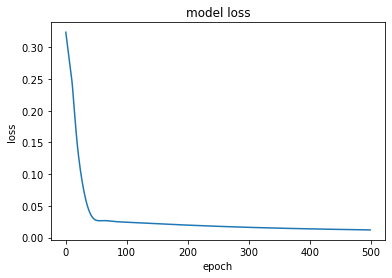

In [17]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
predictions = model.predict(xtrain_scale)

In [19]:
#mean_absolute_percentage_error(y_train, predictions)

### Accuracy on validation set

In [20]:
# predictions = scaler_y.inverse_transform(predictions)
# predictions

In [21]:
# mean_absolute_error(y_val, predictions)

In [22]:
# mean_squared_error(y_val, predictions)
# math.sqrt(mean_squared_error(y_val, predictions))

In [23]:
# mean_absolute_percentage_error(y_val, predictions)

### Test Data and Accuracy Readings

In [24]:
h2data = pd.read_csv('test.csv')
h2data.head()


,Unnamed: 0,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Movie_aveRating,TV_aveRating,GDP,Population,Gini_Index,Happiness_Share,Life_Satisfaction,Broadband_subscriptions,Cellular_subscriptions,averageRating,numVotes
0,46,PT,Portugal,5047,3419,1628,9.03,13.54,18.06,6.822973,6.822973,2.285392e+11,10305564.0,32.8,87.207031,5.768,40.806254,116.262992,6.560000,53837.533333
1,27,ID,Indonesia,3887,2449,1438,8.36,10.66,12.96,6.838804,6.838804,1.058424e+12,273523621.0,37.0,92.942940,5.347,3.916703,130.061386,7.152941,56026.470588
2,3,BE,Belgium,4990,3374,1616,10.16,15.24,20.32,6.794554,6.794554,5.218613e+11,11555997.0,27.2,91.081085,6.839,40.848697,99.483201,7.146667,92616.133333
3,36,MX,Mexico,4993,3158,1835,6.62,10.43,14.24,6.720545,6.720545,1.073916e+12,128932753.0,45.4,94.250000,5.964,16.448040,93.445588,7.266667,66604.500000
4,53,KR,South Korea,5195,3334,1861,8.07,11.47,14.45,6.755185,6.755185,1.637896e+12,51780579.0,31.4,89.741447,5.793,43.554782,137.536175,7.000000,50869.533333


In [25]:
tlibrary = h2data['Total Library Size']
ttv = h2data['No. of TV Shows']
tmovies = h2data['No. of Movies']
tmavgrate = h2data['Movie_aveRating']
ttavgrate = h2data['TV_aveRating']
tgdp = h2data['GDP']
tpop = h2data['Population']
tgini = h2data['Gini_Index']
thappy = h2data['Happiness_Share']
tlife = h2data['Life_Satisfaction']
tbsubs = h2data['Broadband_subscriptions']
tcsubs = h2data['Cellular_subscriptions']

tcost = h2data['Cost Per Month - Standard ($)']


In [26]:
atest = np.column_stack((tlibrary,ttv,tmovies,tmavgrate,ttavgrate,tgdp,tpop,tgini,thappy,tlife,tbsubs,tcsubs))
atest = sm.add_constant(atest, prepend=True)
btest = tcost
btest=btest.values

In [27]:
np.shape(atest)

(13, 13)

In [28]:
scaler_atest = MinMaxScaler()
print(scaler_atest.fit(atest))
ascale=scaler_atest.transform(atest)

MinMaxScaler()


In [29]:
np.shape(ascale)

(13, 13)

In [30]:
bpred = model.predict(ascale)
bpred

array([[0.5013563 ],
       [0.19397342],
       [0.6221762 ],
       [0.44887006],
       [0.59606224],
       [0.42962387],
       [0.7282666 ],
       [0.2725024 ],
       [0.5401348 ],
       [0.35108843],
       [0.7037993 ],
       [0.24926925],
       [0.43886626]], dtype=float32)

In [31]:
bpred = scaler_y.inverse_transform(bpred)

In [32]:
bpred

array([[11.753681 ],
       [ 6.386776 ],
       [13.863195 ],
       [10.837271 ],
       [13.407247 ],
       [10.501233 ],
       [15.715534 ],
       [ 7.7578917],
       [12.430753 ],
       [ 9.130005 ],
       [15.288336 ],
       [ 7.352241 ],
       [10.662604 ]], dtype=float32)

In [33]:
btest

array([13.54, 10.66, 15.24, 10.43, 11.47,  6.3 , 12.17, 10.99, 12.42,
        7.11, 13.54,  9.14, 11.29])

### Accuracy on test set

In [34]:
mean_absolute_error(btest, bpred)

2.0733837289076584

In [38]:
mse = mean_squared_error(btest, bpred)

In [36]:
mean_absolute_percentage_error(btest, bpred)

0.211433667233826

In [39]:
rmse = math. sqrt(mse)
rmse

2.4598370924920374